# 지역별 노인인구 비율

In [4]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [5]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [6]:
plt.rc("font", family="Malgun Gothic")

In [13]:
elderly_people_sql = """
    SELECT
        city,
        (total_elderly_2019 + total_elderly_2020 + total_elderly_2021 + total_elderly_2022 + total_elderly_2023) / (total_2019 + total_2020 + total_2021 + total_2022 + total_2023) * 100 AS avg_rate
    FROM
        `calcium-channel-428804-c3.traffic_accident.elderly_people`
"""

In [14]:
elderly_people_df = client.query(elderly_people_sql).to_dataframe()
elderly_people_df = elderly_people_df.set_index("city")
elderly_people_df = elderly_people_df.sort_index()
elderly_people_df.drop("전국", inplace=True)

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [15]:
elderly_people_df

,avg_rate
city,
강원,21.306832
경기,13.639759
경남,17.952205
경북,22.269618
광주,14.542447
대구,17.080067
대전,14.836246
부산,19.881892
서울,16.456390


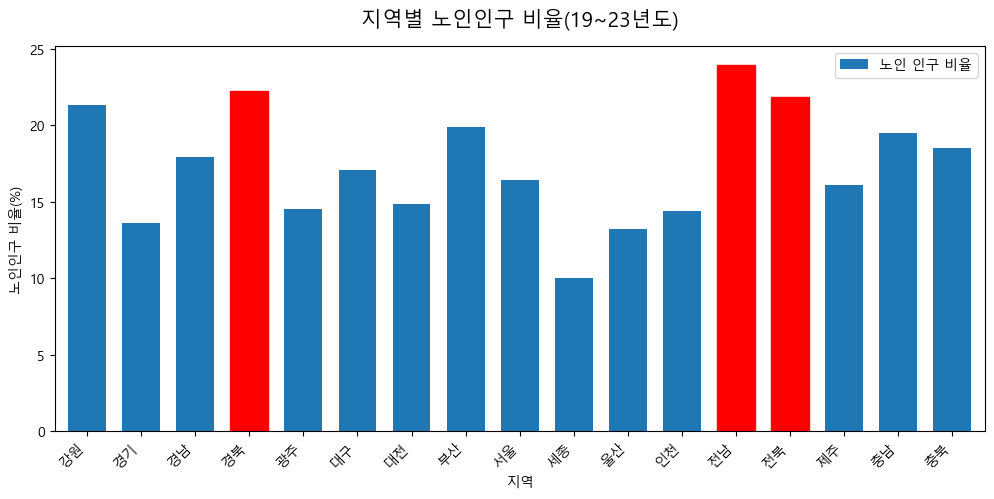

In [16]:
ax = elderly_people_df.plot(kind="bar", width=0.7, figsize=(12, 5))

for bar, city in zip(ax.patches, elderly_people_df.index):
    if city == "전남" or city == "전북" or city == "경북":
        bar.set_color("red")

plt.title("지역별 노인인구 비율(19~23년도)", size=15, pad=15)
plt.xlabel("지역")
plt.ylabel("노인인구 비율(%)")
plt.xticks(rotation=45, ha="right")
plt.legend(["노인 인구 비율"], loc="best")
plt.savefig("./result/elderly_people_v2.png", bbox_inches="tight")

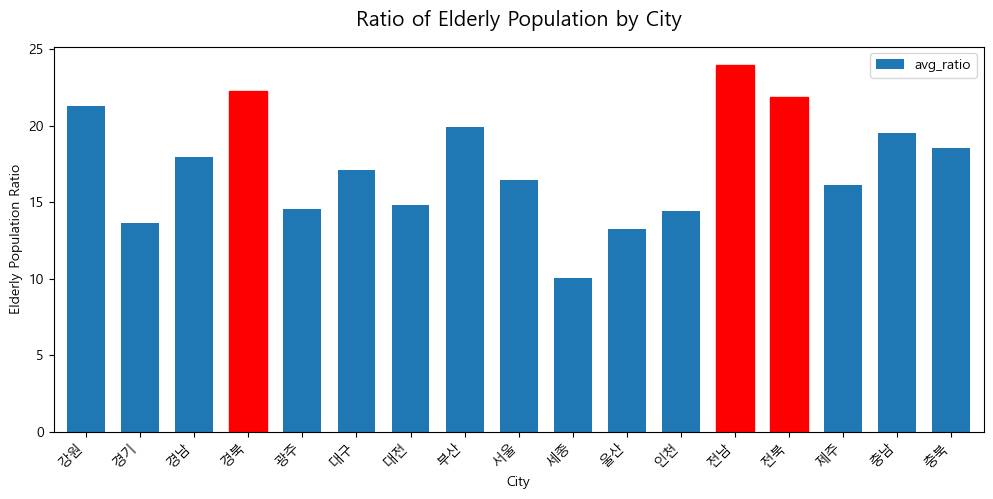

In [17]:
ax = elderly_people_df.plot(kind="bar", width=0.7, figsize=(12, 5))

for bar, city in zip(ax.patches, elderly_people_df.index):
    if city == "전남" or city == "전북" or city == "경북":
        bar.set_color("red")

plt.title("Ratio of Elderly Population by City", size=15, pad=15)
plt.xlabel("City")
plt.ylabel("Elderly Population Ratio")
plt.xticks(rotation=45, ha="right")
plt.legend(["avg_ratio"], loc="best")
plt.savefig("./result/elderly_people_v1.png", bbox_inches="tight")